<h1>Desafío Spike: Predicción de precios de insumos básicos en Chile</h1>

In [1]:
import datetime

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing

<h2>1. Datos: Precipitaciones, Indicadores Económicos Banco Central</h2>

In [2]:
rain_df = pd.read_csv('precipitaciones.csv')
print("Rain table with shape", rain_df.shape)
rain_df.head()

Rain table with shape (496, 9)


,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [3]:
bank_df = pd.read_csv('banco_central.csv')
print("Bank table with shape", bank_df.shape)
bank_df.head()

Bank table with shape (614, 85)


,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


<h2>2. Análisis de datos. Creación de variables</h2>

<h3> Tabla de precipitaciones </h3>

In [4]:
rain_df.dtypes

date                                    object
Coquimbo                               float64
Valparaiso                             float64
Metropolitana_de_Santiago              float64
Libertador_Gral__Bernardo_O_Higgins    float64
Maule                                  float64
Biobio                                 float64
La_Araucania                           float64
Los_Rios                               float64
dtype: object

In [5]:
# Find if there are missing values on each column
rain_df.isnull().any()

date                                   False
Coquimbo                               False
Valparaiso                             False
Metropolitana_de_Santiago              False
Libertador_Gral__Bernardo_O_Higgins    False
Maule                                  False
Biobio                                 False
La_Araucania                           False
Los_Rios                               False
dtype: bool

In [6]:
# Find dates departing from expected format
weird_values = [a for a in rain_df.date.values if len(a) != 10]
print("Weird values:", weird_values)

Weird values: []


In [7]:
# Find if there are duplicated dates
rain_df[rain_df.duplicated(subset=['date'], keep=False)]

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios


In [8]:
def parse_date(date_string):
    year, month, day = date_string.split("-")
    year, month, day = int(year), int(month), int(day)
    return [year, month, day]


def parse_date_column(date_string_column):
    ymd_table = [parse_date(date_string) for date_string in date_string_column]
    ymd_table = np.stack(ymd_table, axis=0)
    return ymd_table


# Parse years, months and days to simplify their inspection
ymd_table = parse_date_column(rain_df.date.values)
rain_df['year'] = ymd_table[:, 0]
rain_df['month'] = ymd_table[:, 1]
rain_df['day'] = ymd_table[:, 2]
rain_df.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,year,month,day
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010,1989,2,1
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041,1998,10,1
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098,2001,2,1
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488,2008,11,1
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235,2009,4,1


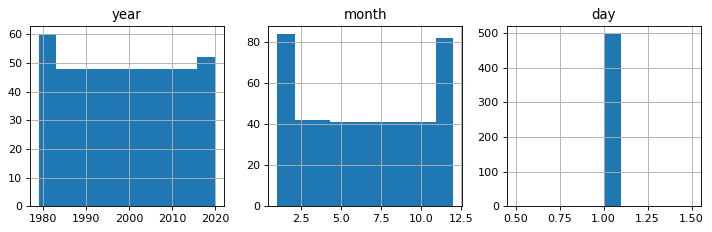

,year,month,day
count,496.000000,496.000000,496.0
mean,1999.169355,6.467742,1.0
std,11.945142,3.461617,0.0
min,1979.000000,1.000000,1.0
25%,1989.000000,3.000000,1.0
50%,1999.000000,6.000000,1.0
75%,2009.250000,9.000000,1.0
max,2020.000000,12.000000,1.0


In [9]:
# Find if there are unusual values in dates
fig, axes = plt.subplots(1, 3, figsize=(9, 3), dpi=80)
rain_df[["year", "month", "day"]].hist(ax=axes)
plt.tight_layout()
plt.show()

rain_df[["year", "month", "day"]].describe()

In [10]:
# Find if there are missing months
# Because dates are unique, we can simply count months for each year
check_df = rain_df[["year", "month"]].groupby(by=["year"]).count()
incomplete_df = check_df[check_df.month < 12]
incomplete_df
# As expected, only year 2020 is incomplete with 4 months (i.e., until april)

,month
year,
2020,4


In [11]:
# Drop previously used auxiliary variables
rain_df = rain_df.drop(columns=["year", "month", "day"])  

In [12]:
# Inspect statistics of the values of rains
# As we go south we expect larger values
rain_df.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


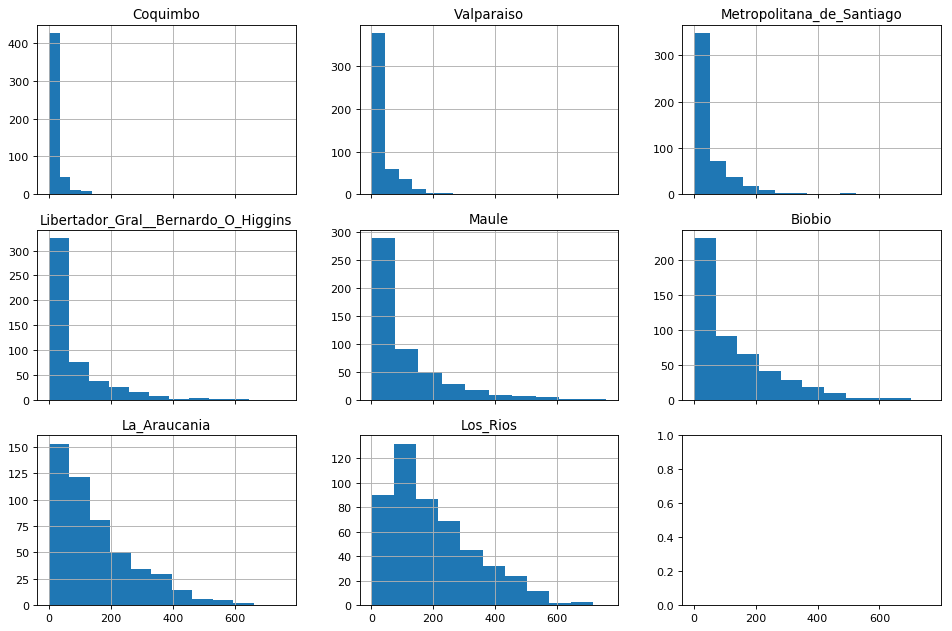

In [13]:
# Inspect histograms of the values of rains
# As we go south we expect larger values
fig, axes = plt.subplots(3, 3, figsize=(12, 8), dpi=80, sharex=True)
axes = axes.flatten()[:8]
rain_df.drop(columns=["date"]).hist(ax=axes)
plt.tight_layout()
plt.show()

**Observaciones: precipitaciones**

La tabla de precipitaciones ya se encuentra limpia desde el archivo, sin valores faltantes. Las series de tiempo tienen la fecha de inicio y fin esperada, sin gaps de tiempo, con un formato correcto, y sin duplicados. Además, en todas las fechas se indica un día "dummy" igual a 1 como se esperaba del enunciado (ya que se trata de datos mensuales). En cuanto a los datos de precipitaciones, los valores presentan rangos correctos y son consistentes con la expectativa de que más al sur llueve más.

<h3>Tabla de índices económicos</h3>

In [14]:
bank_df.dtypes
# Columns expected to be numerical (e.g., 'Imacec_empalmado') are not, suggesting format problems

Periodo                                             object
Imacec_empalmado                                    object
Imacec_produccion_de_bienes                         object
Imacec_minero                                       object
Imacec_industria                                    object
                                                    ...   
Generacion_de_energia_electrica_CDEC_GWh            object
Indice_de_ventas_comercio_real_IVCM                 object
Indice_de_ventas_comercio_real_no_durables_IVCM     object
Indice_de_ventas_comercio_real_durables_IVCM        object
Ventas_autos_nuevos                                float64
Length: 85, dtype: object

In [15]:
# Find if there are missing values on each column
bank_df.isnull().any()
# In this case, there are many missing values, but not in the date ('Period') column

Periodo                                            False
Imacec_empalmado                                    True
Imacec_produccion_de_bienes                         True
Imacec_minero                                       True
Imacec_industria                                    True
                                                   ...  
Generacion_de_energia_electrica_CDEC_GWh            True
Indice_de_ventas_comercio_real_IVCM                 True
Indice_de_ventas_comercio_real_no_durables_IVCM     True
Indice_de_ventas_comercio_real_durables_IVCM        True
Ventas_autos_nuevos                                 True
Length: 85, dtype: bool

In [16]:
# As before, we start with the date column
bank_df.Periodo

0      2013-03-01 00:00:00 UTC
1      2013-04-01 00:00:00 UTC
2      2013-05-01 00:00:00 UTC
3      2013-06-01 00:00:00 UTC
4      2013-07-01 00:00:00 UTC
                ...           
609    2008-08-01 00:00:00 UTC
610    2008-09-01 00:00:00 UTC
611    2008-10-01 00:00:00 UTC
612    2008-11-01 00:00:00 UTC
613    2008-12-01 00:00:00 UTC
Name: Periodo, Length: 614, dtype: object

In [17]:
# The format is date AND time rather than just date. But the time stamp is irrelevant, so we drop it
bank_df.Periodo = [a.split(" ")[0] for a in bank_df.Periodo.values]
bank_df.Periodo

0      2013-03-01
1      2013-04-01
2      2013-05-01
3      2013-06-01
4      2013-07-01
          ...    
609    2008-08-01
610    2008-09-01
611    2008-10-01
612    2008-11-01
613    2008-12-01
Name: Periodo, Length: 614, dtype: object

In [18]:
# Find if there are duplicated dates
bank_df[bank_df.duplicated(subset=['Periodo'], keep=False)]

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
65,2018-08-01,109.690.834,994.693.267,101.027.633,1.051.861,931.900.957,106.248.833,117.404.143,109.458.386,110.578.221,...,911.086.301,102.691.109,983.228.221,108.792.744,105.596.535,654.060.172,113.525.936,103.995.337,15.375.472,38729.0
66,2018-08-01,109.690.834,994.693.267,101.027.633,1.051.861,931.900.957,106.248.833,117.404.143,109.458.386,110.578.221,...,911.086.301,102.691.109,983.228.221,108.792.744,105.596.535,654.060.172,113.525.936,103.995.337,15.375.472,38729.0
78,2019-08-01,113.886.371,103.237.519,106.828.407,105.153.122,984.395.274,106.901.816,122.596.004,113.695.907,114.580.893,...,948.715.254,104.034.103,102.619.922,107.666.732,104.591.452,6598,116.203.109,107.385.297,15.342.321,33059.0
79,2019-08-01,113.886.371,103.237.519,106.828.407,105.153.122,984.395.274,106.901.816,122.596.004,113.695.907,114.580.893,...,948.715.254,104.034.103,102.619.922,107.666.732,104.591.452,6598,116.203.109,107.385.297,15.342.321,33059.0


In [19]:
# There are two duplicated dates, and they are the same record, so we just keep one
bank_df = bank_df.drop_duplicates(subset='Periodo')

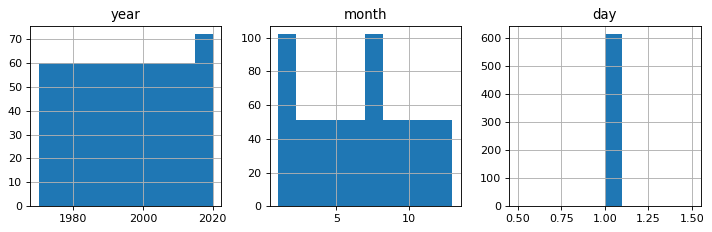

,year,month,day
count,612.000000,612.000000,612.0
mean,1995.000000,6.501634,1.0
std,14.731642,3.457717,0.0
min,1970.000000,1.000000,1.0
25%,1982.000000,3.750000,1.0
50%,1995.000000,6.500000,1.0
75%,2008.000000,9.250000,1.0
max,2020.000000,13.000000,1.0


In [20]:
# Now that we have the same format as in the case of the rain, we repeat the same exploration
ymd_table = parse_date_column(bank_df.Periodo.values)
bank_df['year'] = ymd_table[:, 0]
bank_df['month'] = ymd_table[:, 1]
bank_df['day'] = ymd_table[:, 2]

fig, axes = plt.subplots(1, 3, figsize=(9, 3), dpi=80)
bank_df[["year", "month", "day"]].hist(ax=axes)
plt.tight_layout()
plt.show()

bank_df[["year", "month", "day"]].describe()

In [21]:
# The bank table has data from 1970 to 2020, with a dummy day equal to '1' as expected.
# But there is a month '13', which is incorrect. Let's see where this happens
bank_df[bank_df.month == 13]

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,year,month,day
89,2020-13-01,NaN,NaN,NaN,NaN,NaN,803.222.345,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,893.234.345,NaN,2020,13,1


In [22]:
# It is only the year 2020. Let's see all the data from that year
bank_df[bank_df.year == 2020]

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,year,month,day
84,2020-01-01,110.288.587,110.053.602,971.096.859,107.389.384,122.090.238,121.522.337,108.043.984,110.123.027,111.698.153,...,111.139.827,106.953.412,6798.2,10.990.377,106.139.507,125.792.769,32104.0,2020,1,1
85,2020-02-01,106.982.117,109.066.914,970.172.781,101.005.355,124.713.152,119.993.696,102.962.024,106.934.379,108.021.397,...,105.197.492,101.356.894,6368.2,109.187.214,107.607.749,115.854.156,25025.0,2020,2,1
86,2020-03-01,114.025.267,114.239.103,102.936.421,106.375.174,129.143.951,121.312.282,113.370.357,114.477.486,115.187.423,...,10.913.508,111.534.401,6764.5,101.811.696,102.108.611,100.558.413,19177.0,2020,3,1
87,2020-04-01,988.542.998,100.570.487,986.442.174,969.425.393,104.850.643,926.889.279,100.658.794,99.848.482,987.676.061,...,100.815.336,980.837.688,6181.5,757.349.073,763.378.636,731.898.208,8906.0,2020,4,1
88,2020-05-01,982.393.209,969.940.132,106.092.921,937.147.742,924.598.764,893.637.866,101.805.244,987.747.993,972.149.892,...,106.233.534,928.877.962,6406.2,843.783.483,836.117.127,876.143.273,8681.0,2020,5,1
89,2020-13-01,NaN,NaN,NaN,NaN,NaN,803.222.345,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,893.234.345,NaN,2020,13,1
90,2020-06-01,968.929.046,909.523.847,103.616.298,920.403.499,80.182.653,891.539.668,103.608.903,974.199.885,96.001.603,...,106.350.102,894.644.274,6419.1,835.159.772,824.851.611,878.670.656,8971.0,2020,6,1
91,2020-07-01,966.693.225,933.369.433,104.988.256,969.434.205,813.420.488,931.746.336,996.428.565,966.321.757,955.926.074,...,10.629.584,946.859.919,6477.7,901.338.756,878.226.907,998.894.175,11454.0,2020,7,1
92,2020-08-01,101.314.552,926.876.935,103.697.799,980.026.279,798.286.232,108.232.893,104.806.496,100.569.037,10.092.332,...,105.462.309,960.377.084,6452,119.872.405,107.356.493,172.702.233,19037.0,2020,8,1
93,2020-09-01,103.201.091,922.072.659,100.589.658,100.132.069,793.042.271,111.622.999,108.317.886,102.561.718,103.388.943,...,99.974.429,972.476.933,6163.1,118.690.966,107.622.401,165.411.522,31897.0,2020,9,1


In [23]:
# Apparently, the month '13' is actually the month '12', because the latter is missing.
# We could fix the dates by changing that value, but since the rain table is only until 2020-04,
# that error is irrelevant. Therefore, we can drop it
bank_df = bank_df[bank_df.month != 13]

In [24]:
# Find if there are missing months
# Because dates are unique, we can simply count months for each year
check_df = bank_df[["year", "month"]].groupby(by=["year"]).count()
incomplete_df = check_df[check_df.month < 12]
incomplete_df
# Only the year 2020 is incomplete, as expected from the dropping of the last record

,month
year,
2020,11


In [25]:
# Drop previously used auxiliary variables
bank_df = bank_df.drop(columns=["year", "month", "day"])  

In [26]:
# Now let's start the inspection and cleaning of the economic indices
bank_df.describe()

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
count,611.000000,611.000000,170.000000,251.000000,251.000000,451.000000,155.000000,143.000000
mean,576.175565,53.853149,215.576176,5.075016,63.653147,42.984767,88.781923,26565.412587
std,466.602227,89.429346,68.971577,8.611861,29.816090,28.046418,36.798587,7128.420440
min,34.940000,1.320000,79.490000,1.612800,18.600000,11.300000,29.233000,4658.000000
25%,291.685000,4.755000,161.922500,2.873900,39.790000,20.050000,55.304000,23668.500000
50%,384.840000,6.060000,200.340000,3.890000,59.370000,30.300000,88.043000,27801.000000
75%,816.420000,32.575500,287.197500,5.955000,79.870000,59.605000,112.000000,31699.000000
max,1969.780000,431.028000,384.380000,136.338000,133.900000,133.930000,187.875000,39263.000000


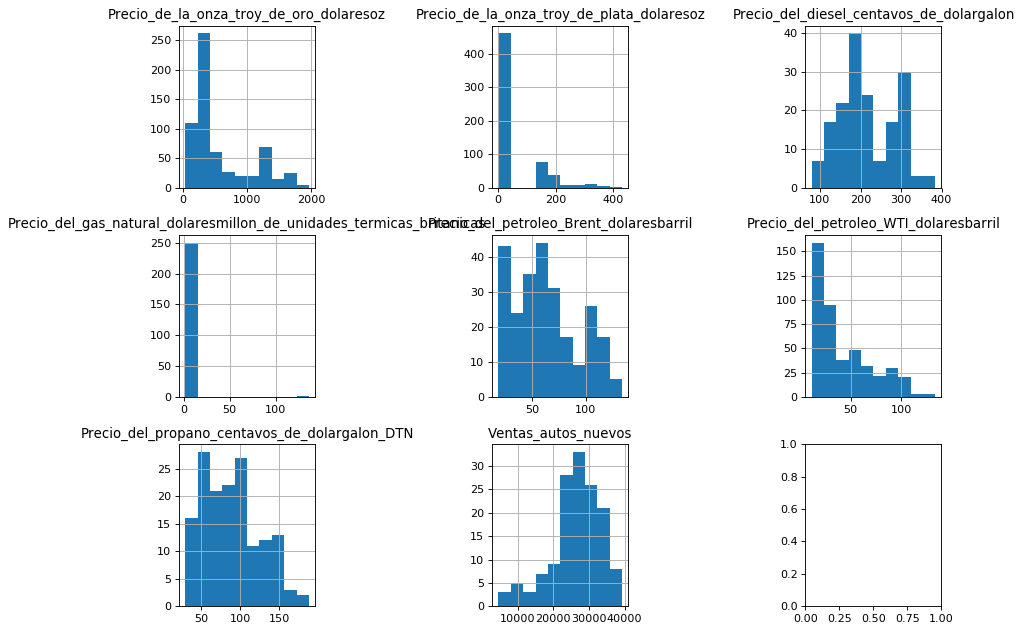

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8), dpi=80)
axes = axes.flatten()[:8]
bank_df.drop(columns=["Periodo"]).hist(ax=axes)
plt.tight_layout()
plt.show()

In [28]:
# Only 8 out of the 84 indices have proper data type (numerical).
# The remaining columns need proper reformating.
# Of the currently available columns, all of them show sensible behavior except 'Precio_del_gas_natural', 
# where there appears to be outliers. Let's see closer
col_name = "Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas"
subset = bank_df[["Periodo", col_name]]
subset = subset[subset[col_name] > 10]
subset

,Periodo,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas
517,2000-12-01,10.6200
543,2003-02-01,10.7100
554,2004-01-01,10.0400
574,2005-09-01,12.5315
575,2005-10-01,136.3380
576,2005-11-01,10.3005
577,2005-12-01,13.0490
605,2008-04-01,10.1800
606,2008-05-01,11.2676
607,2008-06-01,12.6824


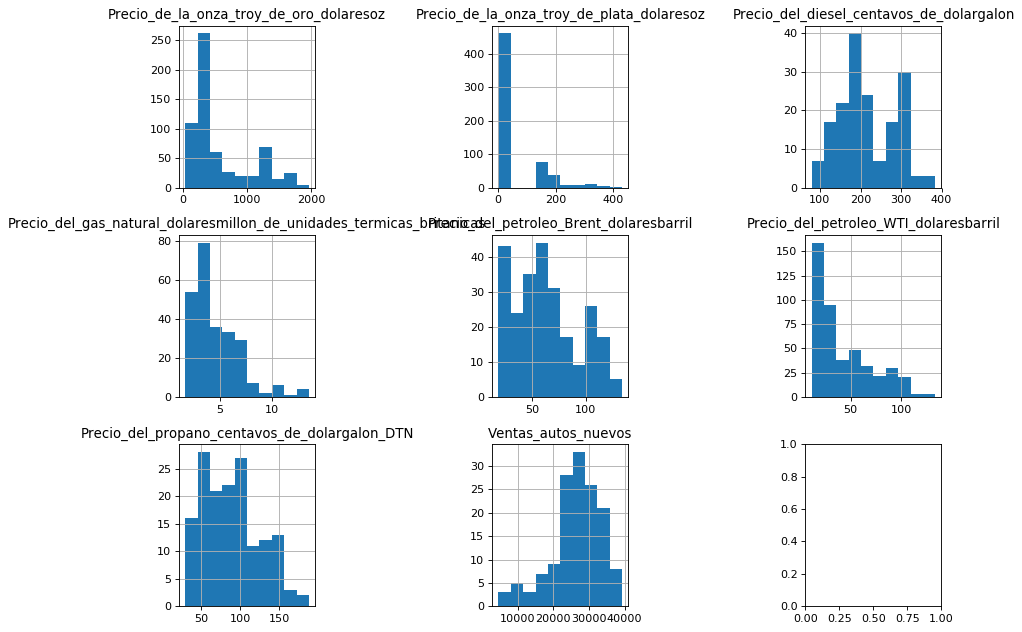

In [29]:
# Indeed there is an outlier in the price in october, 2005. 
# The correct value is likely to be ten times less. We fix it:
bank_df.loc[bank_df[col_name] > 100, col_name] /= 10

fig, axes = plt.subplots(3, 3, figsize=(12, 8), dpi=80)
axes = axes.flatten()[:8]
bank_df.drop(columns=["Periodo"]).hist(ax=axes)
plt.tight_layout()
plt.show()

# Now the histograms looks sensible.

In [30]:
# Let's inspect the columns with formatting problems
bank_df
# Apparently the problem is the thousand and decimal separators, that causes numbers to be read as strings.
# Additionally, the dots are placed incorrectly. For instance, the Imacec_empaldado
# changes from 101.642.954 to 998.310.201 in just one month. This also explains why we had the outlier
# in the column 'Precio_del_gas_natural'.

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2008-08-01,792.872.358,809.540.557,844.433.727,862.655.599,721.027.743,640.625.573,829.163.596,799.073.886,786.659.097,...,99.298.129,NaN,847.665.895,NaN,905.764.363,475.746.478,NaN,NaN,NaN,NaN
610,2008-09-01,786.802.278,814.228.983,875.931.483,85.990.071,693.602.068,629.581.947,810.645.789,791.396.405,772.867.447,...,972.530.264,NaN,859.131.907,NaN,894.789.858,453.055.435,NaN,NaN,NaN,NaN
611,2008-10-01,841.834.519,896.565.998,980.164.017,889.145.021,79.386.738,653.517.611,856.040.952,85.038.187,818.131.883,...,105.609.319,NaN,902.538.952,NaN,981.854.401,478.309.081,NaN,NaN,NaN,NaN
612,2008-11-01,82.846.325,845.666.687,864.252.442,83.063.253,843.834.773,638.884.202,881.094.389,838.436.575,825.672.572,...,10.738.286,NaN,877.968.927,NaN,914.543.986,466.174.958,NaN,NaN,NaN,NaN


In [31]:
# First let's sort the series to determine the correct values
bank_df = bank_df.sort_values(by=["Periodo"]).reset_index(drop=True)
# The hypothesis, as before, is that in a time series the magnitude should not change much
# Therefore, we could guess the right order of magnitude of each entry automatically
# by enforcing that continuity contraint. For simplicity, we will do so using brute force.

# Note that this procedure will loose the real scale of the columns,
# but since this is for a prediction task, the real scale is irrelevant

In [32]:
def reformat_by_continuity(column_data_sorted_by_date):
    column_data_sorted_by_date = column_data_sorted_by_date.copy()
    # To start from a common ground, let's replace everything by its string representation
    column_data_sorted_by_date = np.array([str(a) for a in column_data_sorted_by_date])
    # Now identify numerical entries
    # Everything that is not valid, will be represented by a nan
    is_numerical = np.array([
        np.all([c in '.0123456789' for c in value])
        for value in column_data_sorted_by_date
    ])
    
    entries = column_data_sorted_by_date[is_numerical]  # get only numerical entries for the algorithm
    entries_num = [a.replace(".", "") for a in entries]  # remove all dots 
    # ##########
    # Now find proper order of magnitude sequentially
    # ##########
    prev_val = entries_num[0]  # initialize search using as a reference the first value
    # For the initial value, we assume it has order of magnitude 10
    prev_number_string = ".".join([prev_val[:1], prev_val[1:]])  # e.g.: 1.234567
    prev_number_correct = float(prev_number_string)
    
    magnitudes_to_try = np.arange(-5, 5)
    
    correct_entries = []
    for val in entries_num:
        current_number_string = ".".join([val[:1], val[1:]])  # e.g.: 1.234567
        current_number_without_magnitude = float(current_number_string)
        # We compute all possible values from the list of available magnitudes
        possibilities = np.array([
            current_number_without_magnitude * 10. ** exponent 
            for exponent in magnitudes_to_try
        ])
        # The best choice will be the one closest to the previous value in the sequence
        best_choice_loc = np.argmin((possibilities - prev_number_correct) ** 2)
        current_val_correct = possibilities[best_choice_loc]
        correct_entries.append(current_val_correct)
        # update previous value memory
        prev_number_correct = current_val_correct

    # Generate the repaired column
    repaired_column = np.zeros(len(column_data_sorted_by_date))
    repaired_column[is_numerical] = correct_entries
    repaired_column[~is_numerical] = np.nan
    repaired_column = pd.to_numeric(repaired_column)
    return repaired_column


# Repair columns
new_bank_df = bank_df.copy()
for col_name in new_bank_df.columns:
    if col_name == 'Periodo':
        # The date column is preserved
        continue
    column_data_sorted_by_date = new_bank_df[col_name].values
    repaired_data = reformat_by_continuity(column_data_sorted_by_date)
    new_bank_df[col_name] = repaired_data
    
new_bank_df.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


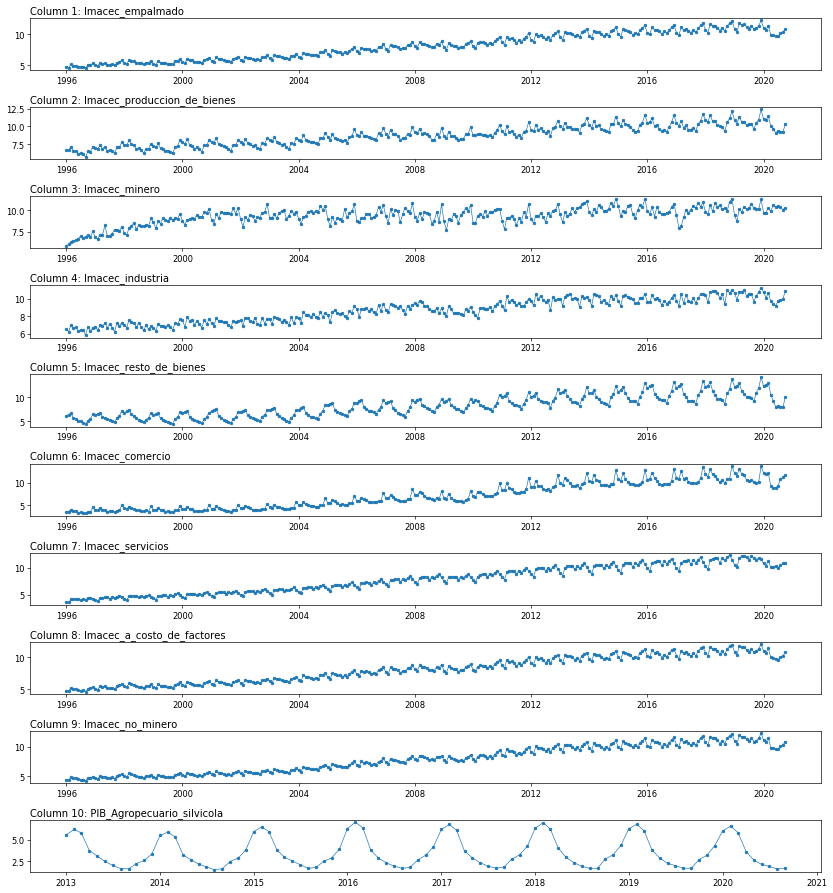

In [33]:
# Inspect the ranges and continuities of the repaired table
start_column = 1
n_columns = 10

columns_subset = list(range(start_column, start_column + n_columns))

time_axis = pd.to_datetime(new_bank_df["Periodo"]).values

fig, axes = plt.subplots(n_columns, 1, figsize=(14, 1.5 * n_columns), dpi=60)
for ax, col_loc in zip(axes.flatten(), columns_subset):
    col_name = new_bank_df.columns[col_loc]
    ax.plot(time_axis, new_bank_df[col_name].values, marker='o', markersize=3, linewidth=0.8)
    ax.set_title('Column %d: %s' % (col_loc, col_name), loc="left")
plt.tight_layout()
plt.show()

Columns where the algorithm failed:


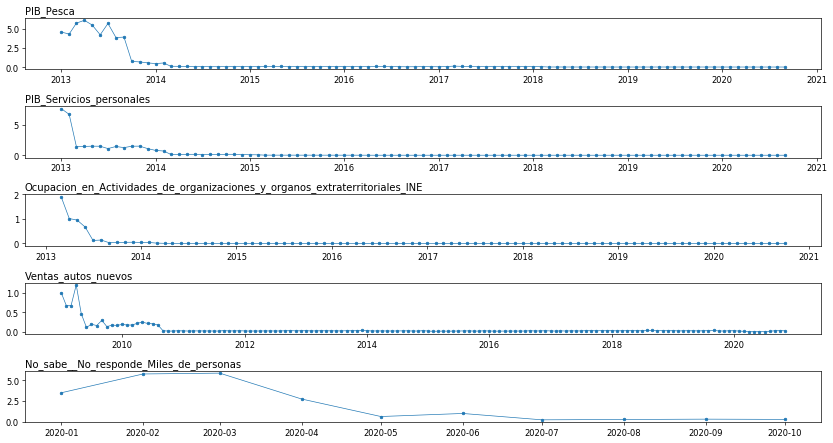

In [34]:
# Time series where automatic repair likely failed
# because the real trends had time points with abrupt changes in value
failed_columns = [
    "PIB_Pesca", 
    "PIB_Servicios_personales",
    "Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE",
    "Ventas_autos_nuevos",
    "No_sabe__No_responde_Miles_de_personas",
]
print("Columns where the algorithm failed:")
time_axis = pd.to_datetime(new_bank_df["Periodo"]).values
n_columns = len(failed_columns)
fig, axes = plt.subplots(n_columns, 1, figsize=(14, 1.5 * n_columns), dpi=60)
for ax, col_name in zip(axes.flatten(), failed_columns):
    ax.plot(time_axis, new_bank_df[col_name].values, marker='o', markersize=3, linewidth=0.8)
    ax.set_title('%s' % col_name, loc="left")
plt.tight_layout()
plt.show()

**Observaciones: índices económicos**

La tabla de índices económicos presenta problemas desde el archivo que requirieron una limpieza en varios aspectos. 

En la columna de fechas se removieron duplicados, se cambió el formato para coincidir con aquél de la tabla de precipitaciones, y se detectó un mes con un valor incorrecto (13) que probablemente correspondía a diciembre (12) pero es irrelevante ya que está más allá de los datos disponibles en la tabla de precipitaciones. Se verificó que no existen gaps entre las fechas de inicio y fin, y que, al igual que en las precipitaciones, existe el día "dummy" igual a 1.

En cuanto a los índices económicos, la lectura de los datos se dificultó debido a la inconsistencia en el formato de los valores numéricos. Específicamente, el problema era la ubicación de los separadores de miles o de decimales. En una inspección rápida no se detectó una heurística general para posicionar la coma decimal, por lo que se optó por explotar la continuidad de los valores de las series de tiempo para implementar un algoritmo sencillo de reparación, en el cuál se busca por fuerza bruta el orden de magnitud de cada punto en el tiempo que satisface estar cerca del punto que le precede. Como consecuencia de dicho algoritmo, se perdió la unidad de medida real de las columnas, pero esto se consideró irrelevante porque el objetivo final es desarrollar un modelo de predicción.

Al inspeccionar las columnas numéricas luego de la corrección, se observó que el algoritmo funcionó en la gran mayoría de los casos. Sin embargo, se encontraron 5 columnas en donde el algoritmo falló, justamente porque en ellas se viola la hipótesis de cercanía de los valores consecutivos. En otras palabras, en algunos instantes de tiempo dichas series de verdad mostraban saltos bruscos. Dichas columnas son:
- "PIB_Pesca"
- "PIB_Servicios_personales"
- "Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE"
- "Ventas_autos_nuevos"
- "No_sabe__No_responde_Miles_de_personas"

Por sus nombres, parecieran ser columnas irrelevantes para el problema de predicción solicitado, por lo que se decide ignorarlas en este desarrollo.

En esta tabla, a diferencia de la tabla de precipitaciones, existen varios valores faltantes. Sin embargo, parecen corresponder principalmente a los datos entre enero de 1970 y el inicio real de cada serie de tiempo, ya que durante la inspección se observó que varias series de tiempo inician mucho después y que, a partir de su inico, se observan bien pobladas.

Por último, se observaron dos tendencias interesantes. La primera es que en varias series de tiempo existen tendencias estacionales, principalmente de período anual, y/o tendencias a largo plazo de crecimiento o decrecimiento. La segunda es que en algunas series de tiempo se ve claramente el efecto de la pandemia (i.e., post marzo 2020). Por ejemplo, esto se observa en el PIB de restaurantes y hoteles y en el PIB de transporte.

In [35]:
# Clean tables: Rain
# Sort by date and transform date column to an actual datetime object
clean_rain_df = rain_df.copy()
clean_rain_df["date"] = pd.to_datetime(clean_rain_df["date"], format='%Y-%m-%d')
clean_rain_df = clean_rain_df.sort_values(by=["date"]).reset_index(drop=True)
clean_rain_df.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1979-01-01,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447
1,1979-02-01,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039
2,1979-03-01,0.255490,0.020601,0.000000,0.055488,0.545324,14.435698,28.696504,66.232248
3,1979-04-01,10.173699,11.745779,13.722349,12.989194,21.880607,39.136483,43.617921,73.548127
4,1979-05-01,1.039098,18.609286,50.187148,104.451550,143.914334,219.729235,279.409718,438.005116


In [36]:
# Clean tables: Bank
# Drop failed columns, sort by date and transform date column to an actual datetime object
# Also rename date column to a common name
clean_bank_df = new_bank_df.drop(columns=failed_columns)
clean_bank_df["Periodo"] = pd.to_datetime(clean_bank_df["Periodo"], format='%Y-%m-%d')
clean_bank_df = clean_bank_df.sort_values(by=["Periodo"]).reset_index(drop=True)
clean_bank_df = clean_bank_df.rename(columns={'Periodo': 'date'})
clean_bank_df.head()

,date,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM
0,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>3. Visualización</h2>

In [37]:
def plot_rain(region_name, start_date, end_date, ax=None):
    dataset = clean_rain_df
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    if not(region_name in dataset.columns[1:]):
        raise ValueError("Region not in dataset")
    if not(start_date in dataset.date.values):
        raise ValueError("Start date not in dataset")
    if not(end_date in dataset.date.values):
        raise ValueError("End date not in dataset")
    
    subdata = dataset.loc[
        (dataset.date >= start_date) & (dataset.date <= end_date), ["date", region_name]]
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 2), dpi=100)
    subdata = subdata.set_index("date")
    subdata.plot(ax=ax)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Precipitaciones [mm]")

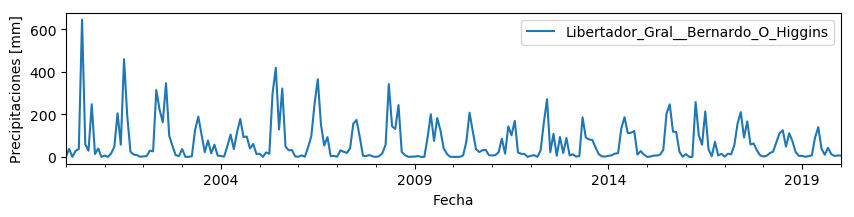

In [38]:
plot_rain('Libertador_Gral__Bernardo_O_Higgins', '2000-01-01', '2020-01-01')

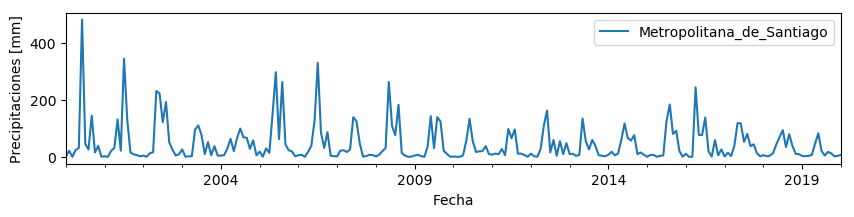

In [39]:
plot_rain('Metropolitana_de_Santiago', '2000-01-01', '2020-01-01')

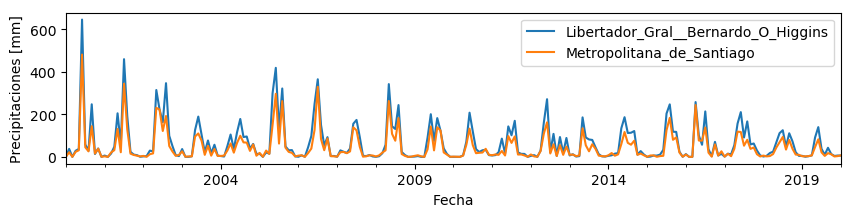

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2), dpi=100)
plot_rain('Libertador_Gral__Bernardo_O_Higgins', '2000-01-01', '2020-01-01', ax=ax)
plot_rain('Metropolitana_de_Santiago', '2000-01-01', '2020-01-01', ax=ax)
plt.show()

**Observaciones**

Se observan estacionalidades en ambas series de tiempo. Específicamente, las precipitaciones son bajas al empezar el año, aumentan al acercarse la mitad del año (i.e., cuando se acerca el invierno), hasta alcanzar un pico y decaer a medida que se acerca el final del año, en donde vuelve a ser verano. Además de la estacionalidad esperada, se observa en ambas series una tendencia general a la baja. Es decir, las precipitaciones anuales se van haciendo cada vez menores a medida que pasan los años, lo que evidencia la sequía que hace años está experimentando el país. Por último, se observa que las precipitaciones tienden a ser mayores en la Región Libertador General Bernardo O'Higgins con respecto a la Región Metropolitana, lo que es consistente con su ubicación más al sur.

In [41]:
def plot_rain_many_years(region_name, years_to_show):
    dataset = clean_rain_df
    if not(region_name in dataset.columns[1:]):
        raise ValueError("Region not in dataset")

    years = clean_rain_df.date.dt.year
    months = clean_rain_df.date.dt.month_name()
    
    subdata = dataset[["date", region_name]]
    subdata = subdata.assign(year=years)
    subdata = subdata.assign(month=months)
    subdata = subdata.drop(columns=["date"])
    
    subdata = subdata[np.isin(subdata.year, years_to_show)]
    fig, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=100)
    subdata.set_index("month").groupby(by="year")['Maule'].plot(
        ax=ax,
        legend=True,
        marker='o', 
        markersize=4,
    )
    ax.set_xticks(np.arange(12))
    ax.set_xticklabels(
        [
            "Enero", "Febrero", "Marzo", 
            "Abril", "Mayo", "Junio",
            "Julio", "Agosto", "Septiembre",
            "Octubre", "Noviembre", "Diciembre"
        ], rotation=45
    )
    ax.set_xlabel("Mes")
    ax.set_ylabel("Precipitaciones [mm]")
    plt.show()

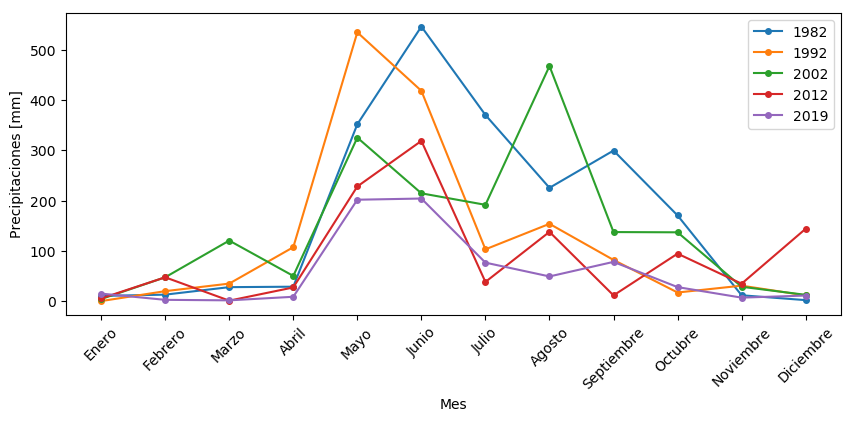

In [42]:
plot_rain_many_years('Maule', [1982, 1992, 2002, 2012, 2019])

**Observaciones**

Del gráfico se evidencia de forma mucho más clara la mega sequía que vive el país. Los años más recientes presentan significativamente menos precipitaciones a lo largo del año. Las diferencas más notables se observan durante los meses cercanos al invierno (mayo a septiembre), en donde el pico de precipitaciones disminuye constantemente. Por ejemplo, en junio de 1982 se registraron más de 500 mm de precipitaciones, mientras que en 2019 se registraron cerca de 200 mm, una disminución de más de la mitad en el regimen de lluvias.

In [43]:
def plot_pib(pib_name_1, pib_name_2, start_date, end_date):
    dataset = clean_bank_df
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    if not(pib_name_1 in dataset.columns[1:]):
        raise ValueError("PIB 1 not in dataset")
    if not(pib_name_2 in dataset.columns[1:]):
        raise ValueError("PIB 2 not in dataset")
    if not(start_date in dataset.date.values):
        raise ValueError("Start date not in dataset")
    if not(end_date in dataset.date.values):
        raise ValueError("End date not in dataset")
    
    subdata = dataset.loc[
        (dataset.date >= start_date) & (dataset.date <= end_date), ["date", pib_name_1, pib_name_2]]
    
    # To ensure a comparable scale
    subdata = subdata.set_index("date")
    fig, axes = plt.subplots(2, 1, figsize=(10, 6), dpi=100)
    for i, pib_name in enumerate([pib_name_1, pib_name_2]):
        subdata[pib_name].plot(ax=axes[i], marker='o', markersize=3, linewidth=0.8)
        axes[i].set_title(pib_name, loc="left")
        axes[i].set_xlabel("Fecha")
        axes[i].set_ylabel("Valor")
        axes[i].grid()
    plt.tight_layout()
    plt.show()

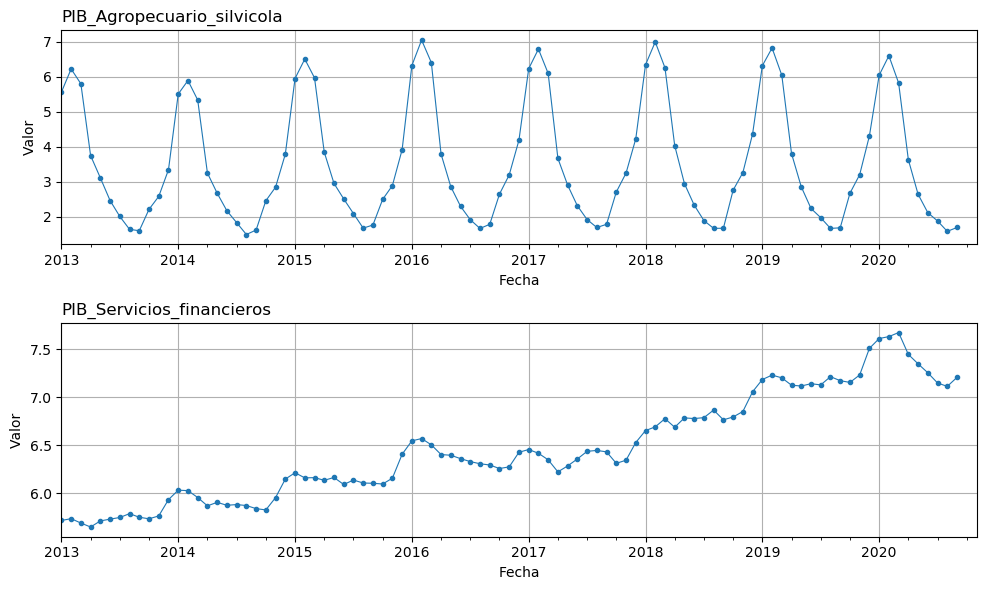

In [44]:
plot_pib(
    'PIB_Agropecuario_silvicola', 
    'PIB_Servicios_financieros', 
    '2013-01-01', '2020-11-01')

**Observaciones**


En ambas series de tiempo se aprecia una estacionalidad: el valor muestra un pico en los meses del verano. Sin embargo, en el PIB agropecuario y silvícola la tendencia a largo plazo se aprecia más bien plana, sin crecimiento, mientras que en el PIB de servicios financieros se observa una tendencia de crecimiento a través de todo el periodo observado, que es de magnitud significativamente mayor a las variaciones estacionales. La única excepción parece ser el período justo después del verano 2020, en donde existe una baja más pronunciada que la estacionalidad típica que coincide con el inicio y desarrollo de la pandemia.

Se puede concluir de lo observado que el sector financiero ha experimentado un gran crecimiento mientras que el agropecuario y silvícola se encuentra más bien estancado. Esto último podría estar relacionado a la sequía del país, puesto que la sequía tiene efectos directos en dicho sector.

<h2>4. Tratamiento y creación de variables</h2>

**¿Cómo podríamos evaluar la correlación entre las distintas series de tiempo y cómo se tienen que correlacionar para entrenar un modelo? ¿Mucha correlación, no correlacionadas, da igual?**

La correlación se tendría que calcular considerando los pares de puntos con la misma fecha en ambas series de tiempo, ignorando los periodos sin coincidencias. 

Para entrenar un modelo, en general se recomienda no utilizar variables de entrada muy correlacionadas entre sí para evitar el problema de la colinealidad. Esta situación es particularmente importante para modelos con solución cerrada que dependen de la matriz de covarianza (como la regresión lineal), ya que puede provocar que el determinante de la matriz sea muy cercano a cero, volviendo inestable el entrenamiento. Notar que esto no aplica para la correlación entre cada predictor y la variable a predecir, en donde una alta correlación es un buen signo.

<h3>Tabla de precio de la leche</h3>

In [45]:
milk_df = pd.read_csv('precio_leche.csv')
milk_df.head()

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18
3,1979,Abr,6.06
4,1979,May,7.25


In [46]:
# Reformat date 
clean_milk_df = milk_df.copy()
clean_milk_df["day"] = 1
clean_milk_df = clean_milk_df.rename(columns={'Anio': 'year', 'Mes': 'month'})
clean_milk_df = clean_milk_df.replace({
    'Ene': 1, 'Feb': 2, 'Mar': 3, 'Abr': 4, 
    'May': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dic': 12 
})
clean_milk_df['date'] = pd.to_datetime(clean_milk_df[['year', 'month', 'day']])
clean_milk_df = clean_milk_df.drop(columns=["year", "month", "day"])
clean_milk_df.head()

,Precio_leche,date
0,3.85,1979-01-01
1,4.58,1979-02-01
2,5.18,1979-03-01
3,6.06,1979-04-01
4,7.25,1979-05-01


In [47]:
clean_milk_df.isnull().any()

Precio_leche    False
date            False
dtype: bool

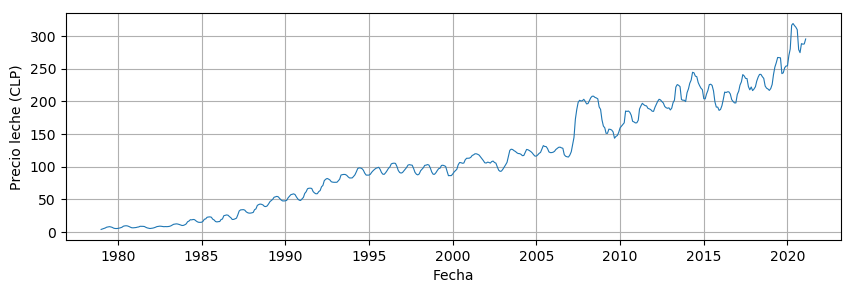

In [48]:
# Visualize milk price trends
fig, ax = plt.subplots(1, 1, figsize=(10, 3), dpi=100)
ax.plot(clean_milk_df.date.values, clean_milk_df.Precio_leche.values, linewidth=0.8)
ax.set_ylabel("Precio leche (CLP)")
ax.set_xlabel("Fecha")
ax.grid()
plt.show()

**Observaciones**

La evolución del precio de la leche también muestra fenómenos de variaciones anuales (estacionalidad) y una tendencia a largo plazo de crecimiento. Existen algunos periodos en donde dicho crecimiento se acelera o desacelera, y algunos años en donde el precio se dispara de forma anómala con respecto a los cambios históricos.

<h3>Unión de tablas</h3>

In [49]:
join_df = clean_milk_df.merge(clean_rain_df, on="date")
join_df = join_df.merge(clean_bank_df, on="date")
join_df

,Precio_leche,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,...,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM
0,3.85,1979-01-01,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.58,1979-02-01,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.18,1979-03-01,0.255490,0.020601,0.000000,0.055488,0.545324,14.435698,28.696504,66.232248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.06,1979-04-01,10.173699,11.745779,13.722349,12.989194,21.880607,39.136483,43.617921,73.548127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.25,1979-05-01,1.039098,18.609286,50.187148,104.451550,143.914334,219.729235,279.409718,438.005116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,253.86,2019-12-01,0.287895,0.165390,3.601443,6.198806,11.327313,14.014122,27.321858,62.170090,...,1.144115,10.274481,11.125214,11.437750,1.084841,10.880399,6.7864,14.629309,13.993856,17.311561
492,254.10,2020-01-01,3.299797,2.003685,6.937148,6.154279,7.875591,19.518225,35.916618,63.389625,...,1.153277,10.352748,10.100785,9.261968,1.111398,10.695341,6.7982,10.990377,10.613951,12.579277
493,270.15,2020-02-01,0.179216,0.003701,0.032064,0.017628,0.200483,10.108504,29.001988,55.838889,...,1.173805,10.489935,9.733464,9.142392,1.051975,10.135689,6.3682,10.918721,10.760775,11.585416
494,279.88,2020-03-01,0.003451,0.000666,0.000000,0.000000,0.115566,12.462699,28.310937,73.640866,...,1.211445,10.724714,10.505794,9.754949,1.091351,11.153440,6.7645,10.181170,10.210861,10.055841


<h3>Transformación de variables</h3>

Para estabilizar la media de las series y así facilitar la tarea de predicción, se decide utilizar como variables las **diferencias** con respecto al valor inmediatamente anterior. Esto implica perder el primer instante de tiempo.

In [50]:
join_diff_df = join_df.drop(columns="date")
join_diff_df = join_diff_df - join_diff_df.shift(1)
join_diff_df.insert(loc=0, column='date', value=join_df["date"])
join_diff_df

,date,Precio_leche,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,...,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM
0,1979-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979-02-01,0.73,-1.462144,1.845130,1.550738,2.737318,12.611423,-0.179023,-7.127867,-11.521408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979-03-01,0.60,-0.924314,-2.411591,-3.997852,-4.290822,-15.802313,-3.244914,10.611432,32.157209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979-04-01,0.88,9.918209,11.725179,13.722349,12.933705,21.335283,24.700785,14.921417,7.315879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1979-05-01,1.19,-9.134601,6.863506,36.464799,91.462356,122.033727,180.592753,235.791797,364.456989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2019-12-01,2.64,0.276307,0.134562,1.790772,1.891674,4.149842,-13.654036,-39.223267,-71.101719,...,-0.006975,-0.031930,0.740223,1.330124,0.055691,0.199717,0.4764,4.401485,4.023052,5.998858
492,2020-01-01,0.24,3.011902,1.838295,3.335705,-0.044527,-3.451722,5.504102,8.594760,1.219535,...,0.009162,0.078266,-1.024430,-2.175782,0.026557,-0.185058,0.0118,-3.638931,-3.379906,-4.732284
493,2020-02-01,16.05,-3.120582,-1.999984,-6.905084,-6.136651,-7.675108,-9.409721,-6.914631,-7.550736,...,0.020528,0.137187,-0.367321,-0.119575,-0.059423,-0.559652,-0.4300,-0.071656,0.146824,-0.993861
494,2020-03-01,9.73,-0.175765,-0.003036,-0.032064,-0.017628,-0.084917,2.354195,-0.691051,17.801977,...,0.037640,0.234779,0.772330,0.612557,0.039376,1.017751,0.3963,-0.737552,-0.549914,-1.529574


<h3>Creación de variables</h3>

Se generan variables que ayuden al modelo con las tendencias históricas

In [51]:
# Variables for year, month and quarter

year_column = join_diff_df["date"].dt.year
month_column = join_diff_df["date"].dt.month
quarter_column = join_diff_df["date"].dt.month.apply(lambda x: (x - 1) // 3)

# Variables for month and quarter will be transformed to one-hot encoding
# because the relationship between price and month/quarter is not linear
month_columns = pd.get_dummies(month_column, prefix="month", drop_first=True)
quarter_columns = pd.get_dummies(quarter_column, prefix="quarter", drop_first=True)
year_column.name = "year"
year_column = year_column.to_frame()

extra_vars = month_columns.merge(quarter_columns, left_index=True, right_index=True)
extra_vars = extra_vars.merge(year_column, left_index=True, right_index=True)

# Add these extra variables
join_diff_df = join_diff_df.merge(extra_vars, left_index=True, right_index=True)
join_diff_df

,date,Precio_leche,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,year
0,1979-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1979
1,1979-02-01,0.73,-1.462144,1.845130,1.550738,2.737318,12.611423,-0.179023,-7.127867,-11.521408,...,0,0,0,0,0,0,0,0,0,1979
2,1979-03-01,0.60,-0.924314,-2.411591,-3.997852,-4.290822,-15.802313,-3.244914,10.611432,32.157209,...,0,0,0,0,0,0,0,0,0,1979
3,1979-04-01,0.88,9.918209,11.725179,13.722349,12.933705,21.335283,24.700785,14.921417,7.315879,...,0,0,0,0,0,0,1,0,0,1979
4,1979-05-01,1.19,-9.134601,6.863506,36.464799,91.462356,122.033727,180.592753,235.791797,364.456989,...,0,0,0,0,0,0,1,0,0,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2019-12-01,2.64,0.276307,0.134562,1.790772,1.891674,4.149842,-13.654036,-39.223267,-71.101719,...,0,0,0,0,0,1,0,0,1,2019
492,2020-01-01,0.24,3.011902,1.838295,3.335705,-0.044527,-3.451722,5.504102,8.594760,1.219535,...,0,0,0,0,0,0,0,0,0,2020
493,2020-02-01,16.05,-3.120582,-1.999984,-6.905084,-6.136651,-7.675108,-9.409721,-6.914631,-7.550736,...,0,0,0,0,0,0,0,0,0,2020
494,2020-03-01,9.73,-0.175765,-0.003036,-0.032064,-0.017628,-0.084917,2.354195,-0.691051,17.801977,...,0,0,0,0,0,0,0,0,0,2020


In [52]:
# Variables for lags/accumulated stats
date_col_names = [
    name for name in join_diff_df.columns 
    if np.any(
        [prefix in name for prefix in ["date", "year", "month", "quarter"]]
    )
]

nondate_df = join_diff_df.drop(columns=date_col_names)

predictors_to_add = []

# For each non-date variable, consider moving averages
# We consider past windows of 3 and 6 months
for window in [3, 6]:
    extra_var = nondate_df.rolling(window).mean().add_suffix("_mean%d" % window)
    predictors_to_add.append(extra_var)

# A more direct signal coming from the milk price and the precipitations might be useful
# So we consider their lagged values up to three months in the past
milk_price_col = nondate_df["Precio_leche"].to_frame()
milk_price_col.name = "Precio_leche"
rain_cols = nondate_df[clean_rain_df.columns[1:]]
for lag in [1, 2, 3]:
    milk_extra = milk_price_col.shift(lag).add_suffix("_lag%d" % lag)
    rain_extra = rain_cols.shift(lag).add_suffix("_lag%d" % lag)
    predictors_to_add.append(milk_extra)
    predictors_to_add.append(rain_extra)

# Add these new columns to the current dataset
expanded_join_diff_df = join_diff_df.copy()
for pred_to_add in predictors_to_add:
    expanded_join_diff_df = expanded_join_diff_df.merge(
        pred_to_add, left_index=True, right_index=True)
expanded_join_diff_df

,date,Precio_leche,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,...,Los_Rios_lag2,Precio_leche_lag3,Coquimbo_lag3,Valparaiso_lag3,Metropolitana_de_Santiago_lag3,Libertador_Gral__Bernardo_O_Higgins_lag3,Maule_lag3,Biobio_lag3,La_Araucania_lag3,Los_Rios_lag3
0,1979-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979-02-01,0.73,-1.462144,1.845130,1.550738,2.737318,12.611423,-0.179023,-7.127867,-11.521408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979-03-01,0.60,-0.924314,-2.411591,-3.997852,-4.290822,-15.802313,-3.244914,10.611432,32.157209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979-04-01,0.88,9.918209,11.725179,13.722349,12.933705,21.335283,24.700785,14.921417,7.315879,...,-11.521408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1979-05-01,1.19,-9.134601,6.863506,36.464799,91.462356,122.033727,180.592753,235.791797,364.456989,...,32.157209,0.73,-1.462144,1.845130,1.550738,2.737318,12.611423,-0.179023,-7.127867,-11.521408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2019-12-01,2.64,0.276307,0.134562,1.790772,1.891674,4.149842,-13.654036,-39.223267,-71.101719,...,7.433165,-24.14,7.361098,5.308945,12.948171,32.761752,28.959151,-17.687660,-54.986542,-105.364793
492,2020-01-01,0.24,3.011902,1.838295,3.335705,-0.044527,-3.451722,5.504102,8.594760,1.219535,...,-2.417584,1.21,-5.488719,-0.568263,-5.260201,-29.457907,-50.136448,-21.890479,-6.090670,7.433165
493,2020-02-01,16.05,-3.120582,-1.999984,-6.905084,-6.136651,-7.675108,-9.409721,-6.914631,-7.550736,...,-71.101719,7.78,-1.860791,-5.140844,-10.387047,-8.897519,-20.930790,-41.158531,-27.826032,-2.417584
494,2020-03-01,9.73,-0.175765,-0.003036,-0.032064,-0.017628,-0.084917,2.354195,-0.691051,17.801977,...,1.219535,2.64,0.276307,0.134562,1.790772,1.891674,4.149842,-13.654036,-39.223267,-71.101719


In [53]:
# Because we want to predict the milk price for the next month, we add this target to the dataset as well
expanded_join_diff_df.insert(loc=1, column='target', value=expanded_join_diff_df["Precio_leche"].shift(-1))
expanded_join_diff_df

,date,target,Precio_leche,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,...,Los_Rios_lag2,Precio_leche_lag3,Coquimbo_lag3,Valparaiso_lag3,Metropolitana_de_Santiago_lag3,Libertador_Gral__Bernardo_O_Higgins_lag3,Maule_lag3,Biobio_lag3,La_Araucania_lag3,Los_Rios_lag3
0,1979-01-01,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979-02-01,0.60,0.73,-1.462144,1.845130,1.550738,2.737318,12.611423,-0.179023,-7.127867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979-03-01,0.88,0.60,-0.924314,-2.411591,-3.997852,-4.290822,-15.802313,-3.244914,10.611432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979-04-01,1.19,0.88,9.918209,11.725179,13.722349,12.933705,21.335283,24.700785,14.921417,...,-11.521408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1979-05-01,0.46,1.19,-9.134601,6.863506,36.464799,91.462356,122.033727,180.592753,235.791797,...,32.157209,0.73,-1.462144,1.845130,1.550738,2.737318,12.611423,-0.179023,-7.127867,-11.521408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2019-12-01,0.24,2.64,0.276307,0.134562,1.790772,1.891674,4.149842,-13.654036,-39.223267,...,7.433165,-24.14,7.361098,5.308945,12.948171,32.761752,28.959151,-17.687660,-54.986542,-105.364793
492,2020-01-01,16.05,0.24,3.011902,1.838295,3.335705,-0.044527,-3.451722,5.504102,8.594760,...,-2.417584,1.21,-5.488719,-0.568263,-5.260201,-29.457907,-50.136448,-21.890479,-6.090670,7.433165
493,2020-02-01,9.73,16.05,-3.120582,-1.999984,-6.905084,-6.136651,-7.675108,-9.409721,-6.914631,...,-71.101719,7.78,-1.860791,-5.140844,-10.387047,-8.897519,-20.930790,-41.158531,-27.826032,-2.417584
494,2020-03-01,36.37,9.73,-0.175765,-0.003036,-0.032064,-0.017628,-0.084917,2.354195,-0.691051,...,1.219535,2.64,0.276307,0.134562,1.790772,1.891674,4.149842,-13.654036,-39.223267,-71.101719


<h2>5. Modelo</h2>

<h3>División de los datos en entrenamiento y test</h3>

Para independizar lo más posible los datos de entrenamiento con los de prueba, se decide separar la base de datos no de forma aleatoria, sino que usando una fecha de corte. La explicación de esta decisión es que, en general, las series de tiempo tienen puntos vecinos muy correlacionados entre sí. Esto significa que si el tiempo T está en el conjunto de entrenamiento y el tiempo T+1 en el conjunto de test, el modelo podría predecir con gran precisión simplemente porque el dato de test se parece demasiado a uno de sus datos de entrenamiento.

Específicamente, se decide utilizar como conjunto de test los datos a partir del 2018-01-01 para así poder observar el desempeño de la predicción durante al menos dos años enteros, debido a los fenómenos de estacionalidad. No se realiza el corte en fechas más tempranas debido a los pocos datos existentes: si bien la tabla comienza en 1979, hay varias series de tiempo que recién comienzan en el 2013 por ejemplo. Por esta razón, el resultado conseguido aquí debería tratarse solo como una prueba de concepto, ya que podría estar sesgado.

In [54]:
cutoff_date = pd.Timestamp('2018-01-01')
table_train = expanded_join_diff_df[expanded_join_diff_df.date < cutoff_date].reset_index(drop=True)
table_test = expanded_join_diff_df[expanded_join_diff_df.date >= cutoff_date].reset_index(drop=True)

<h3>Selección de variables</h3>

Para disminuir el riesgo de sobre-ajuste del modelo, se procede a eliminar algunas variables. Por simplicidad, esta selección se hace en base a la correlación. El criterio es mantener una alta correlación con el target (precio de la leche en el siguiente mes) y baja correlación con otros predictores. Notar que la selección de variables se hace solo usando el conjunto de entrenamiento para disminuir el sesgo del desempeño en test.

In [55]:
# First identify some variables that are likely irrelevant
milk_price_next_month = table_train.target
min_correlation_with_target = 0.2

predictors = table_train.drop(columns=["date", "target"])
corr_with_milk = predictors.corrwith(milk_price_next_month).abs()
corr_with_milk.name = "corr_with_milk_next_month"
corr_with_milk = corr_with_milk.to_frame()
corr_with_milk = corr_with_milk.sort_values(by="corr_with_milk_next_month", ascending=False)
relevant_variables = corr_with_milk[corr_with_milk.corr_with_milk_next_month > min_correlation_with_target]
relevant_variables.index = relevant_variables.index.set_names(['column_names'])
relevant_variables_names = relevant_variables.reset_index().column_names.values

print("%d relevant variables out of %d original variables" % (
    len(relevant_variables_names), len(predictors.columns)))

102 relevant variables out of 306 original variables


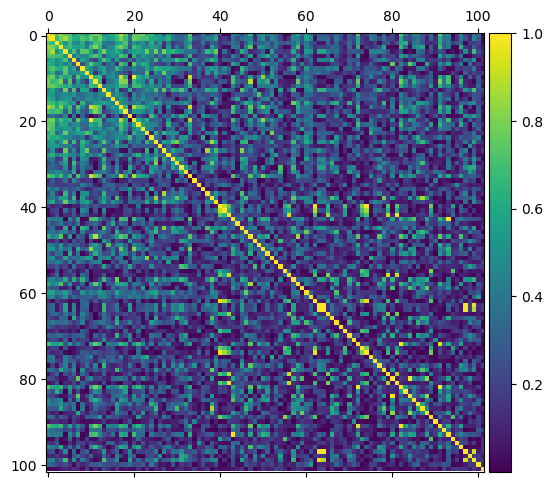

In [56]:
# Correlation matrix of the relevant variables
corr_matrix = table_train[relevant_variables_names].corr().abs()

fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
im = ax.matshow(corr_matrix)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

**Observaciones**

Se observa alta correlación entre algunos pares de variables. En general es alta entre aquellas muy correlacionadas con el target, lo cual es esperable por transitividad. También existen ciertos pares de variables muy correlacionadas, cercano a 1, entre aquellas variables con una correlación moderada con el target. Se procede a eliminar algunas de estas variables redundantes.

In [57]:
# Now, within those variable, remove those that are redundant
max_correlation_with_other_predictor = 0.9

corr_matrix = table_train[relevant_variables_names].corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than a threshold
to_drop = [column for column in upper.columns if any(upper[column] > max_correlation_with_other_predictor)]

# Remove those from the selected features
final_selection_names = [
    col_name for col_name in relevant_variables_names if col_name not in to_drop
]

print("Final selection: %d relevant variables out of %d original variables" % (
    len(final_selection_names), len(predictors.columns)))

Final selection: 85 relevant variables out of 306 original variables


In [58]:
# Now use that filter on the datasets
table_train_selected = table_train[["date", "target"] + final_selection_names]
table_test_selected = table_test[["date", "target"] + final_selection_names]

<h3>Eliminación de valores faltantes</h3>

Por simplicidad, en lugar de imputar se decide eliminar las filas con datos faltantes, ya que son causados principalmente por series de tiempo que aun no han comenzado su registro de datos históricos. Debido a la división de datos, esto es un problema solo en el conjunto de entrenamiento. En el conjunto de test solo se pierde la última fecha del dataset ya que no existe un target.

In [59]:
# Find earliest dates for each non-date column:
date_col_names = [
    name for name in table_train_selected.columns 
    if np.any(
        [prefix in name for prefix in ["date", "year", "month", "quarter"]]
    )
]

earliest_l = []
col_names = table_train_selected.drop(columns=date_col_names).columns
for col_name in col_names:
    subset = table_train_selected[["date", col_name]]
    subset = subset.dropna().reset_index()
    earliest = str(subset.loc[0, "date"])
    earliest_l.append(earliest)
earliest_l = np.array(earliest_l)
sorted_locs = np.argsort(earliest_l)
for loc in sorted_locs:
    print("%s: %s" % (earliest_l[loc], col_names[loc]))

1979-01-01 00:00:00: target
1979-02-01 00:00:00: Precio_de_la_gasolina_en_EEUU_dolaresm3
1979-02-01 00:00:00: Precio_leche
1979-03-01 00:00:00: Precio_leche_lag1
1979-04-01 00:00:00: Precio_leche_mean3
1979-04-01 00:00:00: Precio_del_cobre_refinado_BML_dolareslibra_mean3
1979-05-01 00:00:00: Los_Rios_lag3
1979-05-01 00:00:00: Precio_leche_lag3
1979-07-01 00:00:00: Los_Rios_mean6
1996-07-01 00:00:00: Imacec_servicios_mean6
2000-07-01 00:00:00: Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas_mean6
2006-11-01 00:00:00: Precio_del_diesel_centavos_de_dolargalon
2007-01-01 00:00:00: Precio_del_diesel_centavos_de_dolargalon_mean3
2007-04-01 00:00:00: Precio_del_diesel_centavos_de_dolargalon_mean6
2008-04-01 00:00:00: Precio_del_propano_centavos_de_dolargalon_DTN_mean3
2008-07-01 00:00:00: Precio_del_propano_centavos_de_dolargalon_DTN_mean6
2010-09-01 00:00:00: Ocupados_mean6
2013-02-01 00:00:00: PIB_Administracion_publica
2013-02-01 00:00:00: PIB_Restaurantes_y_hoteles
20

**Observaciones**

Si bien para mantener todas las variables se requiere partir de 2014-07-01, por inspección se decide partir de 2013-07-01 para preservar más datos, ya que con ese corte se preservan la gran mayoría de variables y al parecer las variables que quedan fuera no entregan señales tan relevantes para el precio de la leche.

In [60]:
# Filter start date in the training set
start_date = pd.Timestamp('2013-07-01')
table_train_selected_start = table_train_selected[table_train_selected.date >= start_date]
columns_to_drop = table_train_selected_start.columns[table_train_selected_start.isna().any()].tolist()

# Drop the columns not satisfying that starting date from the train and test datasets
table_train_selected_start = table_train_selected_start.drop(columns=columns_to_drop)
table_test_selected_start = table_test_selected.drop(columns=columns_to_drop)
# And drop the NaN at the end of the test dataset due to the target
table_test_selected_start = table_test_selected_start.dropna()

# Reset index to keep things clean
table_train_selected_start = table_train_selected_start.reset_index(drop=True)
table_test_selected_start = table_test_selected_start.reset_index(drop=True)

<h3>Preprocesamiento de los datos para el modelo</h3>

In [61]:
x_train = table_train_selected_start.drop(columns=["date", "target"]).values
y_train = table_train_selected_start.target.values

x_test = table_test_selected_start.drop(columns=["date", "target"]).values
y_test = table_test_selected_start.target.values

print("Target train with shape", y_train.shape)
print("Predictors train with shape", x_train.shape)

print("Train: %d samples (%1.1f%% of total)" % (y_train.size, 100 * y_train.size / (y_train.size + y_test.size)))
print("Test: %d samples (%1.1f%% of total)" % (y_test.size, 100 * y_test.size / (y_train.size + y_test.size)))

Target train with shape (54,)
Predictors train with shape (54, 74)
Train: 54 samples (66.7% of total)
Test: 27 samples (33.3% of total)


**Observaciones**

El dataset final posee cerca de un tercio del total de los datos como conjunto de test, lo que está en el rango típico para estas aplicaciones con pocos datos. Notar que existen más predictores que ejemplos en el conjunto de entrenamiento, por lo que es importante regularizar el modelo para que no se sobre-ajuste.

In [62]:
# Standardize target (train stats)
target_mean, target_std = y_train.mean(), y_train.std()
y_train_scaled = (y_train - target_mean) / target_std
y_test_scaled = (y_test - target_mean) / target_std

# Standardize predictors (train stats)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

<h3>Entrenamiento y evaluación del modelo</h3>

Por simplicidad, se usa una regresión lineal con una regularización L2.

In [63]:
model = linear_model.Ridge(alpha=0.1)  # L2 regularization
model.fit(x_train_scaled, y_train_scaled)

def predict_and_scale(x_scaled):
    # To recover the unscaled version of the target
    return target_std * model.predict(x_scaled) + target_mean

MSE Train: 0.0303
MSE Test:  89.8121


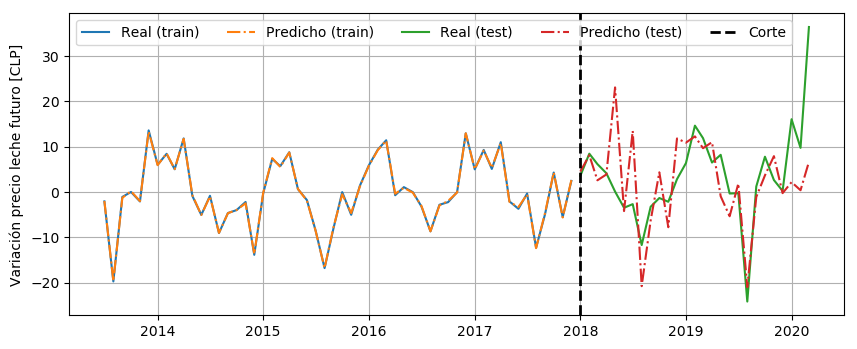

In [64]:
# Visualize predicted variations and compute MSE

y_train_predicted = predict_and_scale(x_train_scaled)
y_test_predicted = predict_and_scale(x_test_scaled)

mse_train = np.mean((y_train_predicted - y_train) ** 2)
mse_test = np.mean((y_test_predicted - y_test) ** 2)

print("MSE Train: %1.4f" % mse_train)
print("MSE Test: % 1.4f" % mse_test)

dates_train = table_train_selected_start.date.values
dates_test = table_test_selected_start.date.values

fig, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=100)
ax.plot(dates_train, y_train, linestyle="-", label="Real (train)")
ax.plot(dates_train, y_train_predicted, linestyle="-.", label="Predicho (train)")
ax.plot(dates_test, y_test, linestyle="-", label="Real (test)")
ax.plot(dates_test, y_test_predicted, linestyle="-.", label="Predicho (test)")
ax.axvline(pd.Timestamp('2018-01-01'), color="k", linewidth=2, linestyle="--", label="Corte")
ax.grid()
ax.set_ylabel("Variación precio leche futuro [CLP]")
ax.legend(loc="upper left", ncol=5)
plt.show()

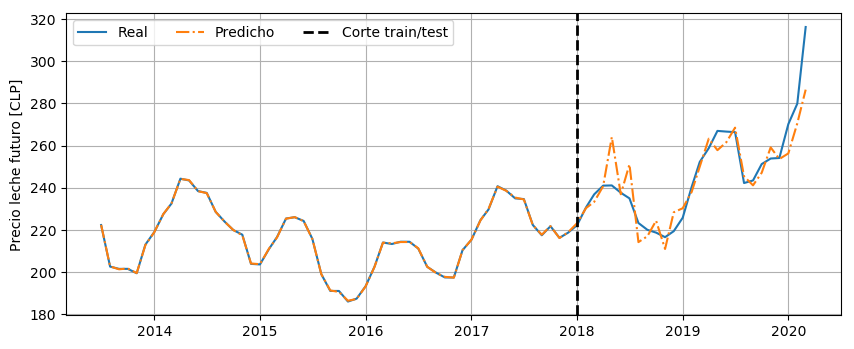

In [65]:
# Visualize prediction with absolute values, not differences

# Table of predicted changes
predictions = np.concatenate([y_train_predicted, y_test_predicted])
dates_predictions = np.concatenate([dates_train, dates_test])
pred_table = pd.DataFrame({"date": dates_predictions, "Variacion_predicha": predictions})
# Merge with table of absolute prices
milk_prices = clean_milk_df.copy()
milk_prices["Precio_leche_siguiente"] = milk_prices["Precio_leche"].shift(-1)
milk_prices = milk_prices.merge(pred_table, on="date")
# Compute the predicted value
milk_prices["Precio_predicho"] = milk_prices["Precio_leche"] + milk_prices["Variacion_predicha"]

# Now plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=100)
ax.plot(
    milk_prices.date.values, 
    milk_prices["Precio_leche_siguiente"].values, 
    linestyle="-", label="Real")
ax.plot(
    milk_prices.date.values, 
    milk_prices["Precio_predicho"].values, 
    linestyle="-.", label="Predicho")
ax.axvline(pd.Timestamp('2018-01-01'), color="k", linewidth=2, linestyle="--", label="Corte train/test")
ax.grid()
ax.set_ylabel("Precio leche futuro [CLP]")
ax.legend(loc="upper left", ncol=5)
plt.show()


**¿Qué datos adicionales te gustaría tener? ¿Qué datos son necesarios para que este modelo funcione/mejore las métricas?**

Probablemente sean de utilidad no solo indicadores ecónomicos y de precipitación, sino que también datos de flujo de las fuentes naturales de agua en las regiones ganaderas, ya que impacta directamente en el volumen de ganado que pueden sostener dichos sectores, y en consecuencia en su capacidad de producción de leche. Si bien dichos flujos deberían estar correlacionados con el histórico de lluvias, sería una señal mucho más directa. Por otro lado, también podría ser de utilidad conocer el volumen aproximado de leche que se encuentra envasada, ya que esto daría una idea de la capacidad del sector para soportar algún tiempo de escasez de producción y en consecuencia medir mejor el impacto que tienen las demás variables en la oferta del mes próximo. Por último, probablemente sea más adecuado ajustar el precio de la leche histórico por inflación para traerlo a valor presente, ya que desde 1986 el valor del peso chileno cambia considerablemente y es difícil que un modelo lineal aprenda a corregir ese efecto de forma general.

**¿Cómo evalúas el resultado del modelo? ¿Qué métricas tiene sentido mirar?**

Como se trata de un problema de regresión, la métrica típica a monitorear es el error cuadrático medio o MSE, el cual se busca minimizar. Es decir, el promedio del cuadrado de la diferencia entre el valor predicho por el modelo y el verdadero valor.

Los resultados actuales tienen varias limitaciones. Si bien el modelo parece capturar la estacionalidad de las predicciones en los años de test, hay periodos en donde el valor predicho se aleja bastante del valor futuro real. Esto ocurre particularmente para la primera mitad del año 2018. Durante el año 2019 las predicciones están más cercanas al valor real. Para el 2020, el modelo falla en predecir el aumento abrupto del precio de la leche. Esto sugiere que este modelo sencillo no logró capturar el fenómeno particular ocurrido en esos meses que hizo que el precio se desviara significativamente de su crecimiento histórico. 

En una primera instancia intenté ocupar las variables directamente en lugar de sus versiones diferenciadas, lo que entregó resultados notoriamente peores (MSE de test sobre 300). En este sentido, estabilizar la media por medio de la diferenciación fue útil. Existe bastante literatura sobre la predicción de series de tiempo con estacionalidades, tendencias y covariables, en donde se pueden encontrar recomendaciones de modelos y preprocesamientos para cada situación. Si tuviese más tiempo para dedicarle a este proyecto, revisaría dicha literatura en busca de un modelo y un tratamiento de las variables que pueda mejorar aun más las métricas.

**¿Para qué aplicaciones puede servir un modelo de este tipo? En particular, ¿Cómo podría ayudar a combatir el cambio climático?**

Un modelo de este tipo puede servir para anticipar situaciones de escasez de insumos básicos, como es el caso de la leche, y tener alguna holgura de tiempo para reaccionar con políticas adecuadas. Producto del cambio climático, varias actividades ecónomicas se han visto afectadas, impactando por ejemplo en la producción y consecuente oferta de ciertos bienes, como lo que se vio en este ejemplo del precio de la leche, cuyo valor ha subido sostenidamente a partir del 2016 según los datos entregados. 

Si bien la prioridad número uno para combatir el cambio climático es tomar acciones que busquen **frenar** y **revertir** el cambio, principalmente a través de la reducción de emisiones de gases de efecto invernadero, también es importante **mitigar** los efectos que el cambio climático está provocando hoy en día. Es justamente en el apoyo de políticas de mitigación en donde modelos predictivos como este pueden ser útiles.